<a href="https://colab.research.google.com/github/yoshihikom/Details_of_Management_Information_BII_11/blob/main/Details_of_Management_Information_BII_11_Text_Analysis(2)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経営情報各論BⅡ：11．テキスト分析(2) テキスト分析(1)の追加（その１）


データサイエンスでは，まずは，きっちりしたデータを集めることが非常に重要です．データの質が分析結果に大きく影響するからです．  
ここでは，データとしてテキスト（つまり文書）（言語データ）を扱います．テキストを計量的に分析することで，大量の言語データを解析し，データの背後に潜む有益な情報を探し出すことが可能となります．具体的には，テキストにおけるキーワードの抽出，特定のキーワードと一緒に使われる語句の特定，使用語彙の類似度に基づくテキストデータの自動分類，などに活用されることが多いです．
テキストマイニングを行うには，何のために（分析目的），どのような言語データ（分析データ）を，どのように分析するか（分析手法），という「しっかりした計画」さえあれば，その可能性は無限大に広がっています．

テキストマイニング（計量テキスト分析）のツールとして，以下の3つの利用が便利．
- KH Coder：https://khcoder.net/
- TETDM：https://tetdm.jp/pukiwiki/index.php
- UserLocalのサイトでのAIテキストマイニング：https://textmining.userlocal.jp/

参考図書：小林裕一郎著「ことばのデータサイエンス」朝倉書店，2019

## １．ことばのデータを集める
### 1.1 データ収集
#### テキストの電子化
- キーボードによる直接入力：手間がかかり大きな労力を要する．ミスがつきものでチェックが必要．
- スキャナと光学文字認識(Optical Character Recognition : OCR)ソフト：テキストの電子化．誤認識の対応が必要．スキャナ付属ソフトで十分．オンライン文字認識もあり(Google Driveなど）
- 音声認識：話し言葉の音声をテキストに書き起こす（IBM WatsonのSpeech to textなど）
#### 電子的なテキストの収集
- アンケートなどを電子的なデータで収集（メール，WordやExcel，Webのフォームに入力など）
#### スクレイピング
- プログラムでのWeb上のテキストデータの収集
- スクレイピング：任意のWebサイトから情報を抜き出す
    - ターゲットの選定：目的のデータのありかを知る
    - データの取得：ターゲットから必要なデータを抜き出す
    - データの整理：集めたデータを整理する
- クローリング：プログラムがWebサイトを定期的に巡回して情報をダウンロード（ロボット）
    - アクセス制限：ロボットによるクローリングを制限しているWebサイトは多い．実際のブラウザを立ち上げてアクセスするなどの対応が必要(例えば，seleniumなどでブラウザでの自動アクセスを利用）
    - アクセス間隔：一定間隔を開けてアクセスしないと攻撃と間違われる可能性あり，疑われないためにも1秒以上の間隔を空けてアクセスすることが必要．
- 大規模なコーパス *1)が得られるが，汎用目的コーパスとは異なることに注意が必要
#### データの量と質
- データの規模に関する明確な基準はない．一般的には大きければ大きいほど良いといわれているが，大規模なデータを構築するには，多大な労力や費用がかかるため，現実的には「できるだけ」多くのデータを収集するよう努力することになる．
- インターネット上の膨大なテキストデータを自動的に収集するツールもあるが，素性の知れないデータばかりを大量に集めても意味がありません．データの質を考慮せずに量だけ増やしても分析結果の信頼性が下がっていくと報告されています．
- 文章数が多すぎても重要なキーワードが隠れてしまう可能性が高くなります．
- 例えば，企業分析を行う場合などは，その企業自身で作成したテキストデータだけでは良いことしか書かれていないため，その企業の課題が浮かび上がってきません．
#### 著作権
- テキスト収集では著作権に配慮する必要がある．収集対象の文書の著作権者と協議し，法的な許諾を得る．

*1)テキストや発話を大規模に集めてデータベース化した言語資料

### 1.2 データの管理
#### ファイル形式
一般的にテキストファイルの形式で保存．WordやPDFファイルはテキストファイルに変換して利用．
#### 文字コード
- windowsではShift-JIS，MacやLinuxではUTF-8
- 適切な文字コードを選択する必要あり．

### 1.3 テキスト整形
テキストに含まれる余分な文字列を削除したり，改行などの書式を整える．
#### 表記ゆれの修正
テキストエディタやプログラミング言語を用いる  
（テキストエディタの例）  
  サクラエディタ(windows)　https://sakura-editor.github.io/  
  秀丸エディタ(windows)　https://hide.maruo.co.jp/software/hidemaru.html  
  TeraPad(windows)　https://tera-net.com/  
  mi(mac)　https://www.mimikaki.net/  
  Sublime Text(mac)　https://www.sublimetext.com/   など  
#### 正規表現
正規表現を使うことでテキスト中の不要な改行や空白を一括で削除可能  
（参考）https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E8%A1%A8%E7%8F%BE  
（正規表現一覧）http://gimite.net/help/devas-ja/all_regex.html

## ２．ことばを計量的データに変換
ことばを計量的に扱うため，どのような処理が必要かについて学ぶ
### 2.1 自然言語処理
人が普段使っている言語をコンピュータで処理することを自然言語処理という
#### 形態素解析
- 計量的な言語研究では，一般的に単語を１つの単位として扱う
- 単語を単位として分析するための処理が形態素解析
- 英語は基本的に個々の単語は空白で区切られているが，日本語は文を単語に分割する前処理が必要
- 日本語の形態素解析では，(1)単語単位への分割（分かち書き），(2)品詞情報の付与，(3)単語の原形の復元（活用から基本形へ），の３つが行われる
- 代表的な形態素解析ツール：ChaSen *1), MeCab *2), Juman *3), Janome *4)など   
*1) https://ja.osdn.net/projects/chasen-legacy/   
*2) http://taku910.github.io/mecab/   
*3) https://nlp.ist.i.kyoto-u.ac.jp/?JUMAN   
*4) https://mocobeta.github.io/janome/   

#### 構文解析
- 文法規則に基づいて，文の構造を句単位や文節単位で解析する技術
- 英語では，句構造（名詞句，形容詞句，副詞句，動詞句，前置詞句など）や単語の係り受け関係を解析（Stanford Parser, Charnik Parserなど）
- 日本語の場合は，文節を単位として係り受け関係の解析を行うことが多く，否定関係の解釈が容易になる（CaboCha, KNPなど）

### 2.2 頻度集計
#### 単語
- 頻度集計表：単語の頻度を集計した表．集計対象は全単語や品詞ごと．

#### 共起語
- 共起語：分析対象とする単語（中心語）の近くによく一緒に現れる単語
- 共起：中心語と共起語が一緒に現れること

#### n-gram
- 文章におけるn個の要素の連鎖のこと．具体的には，文字n-gram，単語n-gram，品詞n-gramなどの種類があり，nも変化する．
- 連続する要素を１つずつずらして，それらを網羅的に取り出したので，必ずしも言語的に意味のあるかたまりとなっているわけではない点は注意が必要
- 形態素解析を必要とせずに集計可能．分かち書きの誤りの影響を受けずテキスト分析可能．
- 携帯電話の予測変換機能などに活用されている

## ３．ことばの記述統計学
- 単語単位の頻度集計の方法，集計した頻度の概要を調べるための統計処理（記述統計）を学ぶ
- 身のまわりの現象からデータを集め，データが何を意味しているのかを，一目でわかるように示すこと（記述統計学）
- 未知の結果を推定すること（推測統計学）  

### 3.1 総語数・異語数
- 総語数（延べ語数）：文中の単語の総数
- 異語数（異なり語数）：文中に何種類の単語が出現しているかをカウント  
（例１）昨日／が／晴れ／で／，／今日／は／雨／だ／。　　総語数：１０，異語数：１０  
（例２）昨日／は／晴れ／で／，／今日／も／晴れ／だ／。　総語数：１０，異語数：９

### 3.2 語彙の多様性
- 語彙の多様性を測る指標の中では，異語率が最も古典的な指標．$異語率=\frac{異語数}{総語数}$で，値が大きいほど（1に近づくほど）文中で用いられる単語の種類が豊富で，値が小さいほど（0に近づくほど）単語の繰り返しが多いことを示す．
- 異語率はテキストの総語数に影響を強く受けるという欠点がある．総語数は無限に増やすことはできるが，単語の数は有限であるため，テキストが長くなると異語率が下がる傾向がある．
- 総語数が大きく異なる複数のテキストから求めた語彙多様性の値を比較する場合は，他の指標を用いることが望ましい
- 総語数の影響を受けにくい指数としてGuiraud（ギロー）指数がある．$Guiraud指数=\frac{異語数}{\sqrt{総語数}}$  

|総語数|異語数|異語率|Guiraud指数|
|-|-|-|-|
|1000|100|0.100|3.162|
|10000|100|0.010|1.000|
|100000|100|0.001|0.316|
  
### 3.3 単純頻度・相対頻度
- 単純頻度は，テキスト中で単語が何回使われているかをそのまま表す数．相対頻度は，単純頻度を総語数で割ったもので，テキストの長さを考慮したもので複数のテキストの比較に使える．

|総語数|単純頻度|相対頻度|
|-|-|-|
|1000|10|0.010|
|2000|10|0.005|

- 相対頻度は非常に小さい値になってしまうこともある．その場合，100や1000のような任意の値をかけて「100語あたりの相対頻度」や「1000語あたりの相対頻度」といった調整した相対頻度を利用する．$相対頻度=\frac{単純頻度}{総語数}$  

|相対頻度|100語あたりの相対頻度|1000語あたりの相対頻度|10000語あたりの相対頻度|
|-|-|-|-|
|0.010|0.100|1.000|10.000|
|0.005|0.050|0.500|5.000|


  
### 3.4 平均値
- $平均値=\frac{データの合計}{データの個数}$
- 平均文長：テキストにおける文の長さ（一文に含まれる単語の数）の平均
- 平均単語長：個々の単語における文字数の平均
- これらの指標は，古くから文体研究などで用いられてきた

### 3.5 最大値・最小値・範囲
- 最大値＝データの中で最も大きい値
- 最小値＝データの中で最も小さい値
- 範囲＝最大値ー最小値
- これらから，データのばらつきの「幅」を知ることができる

### 3.6 分散・標準偏差
- データのばらつき具合を１つの数値で表したい場合の指標
- 分散の計算手順
    1. データの平均値を求める
    2. 個々のデータから平均値を引いた値（偏差）を全て求める
    3. 偏差をすべて2乗した値（偏差平方）を求める
    4. 偏差平方の合計をデータ数で割った値（分散）を求める
- 標準偏差：分散の平方根をとった値（分散の計算過程で偏差を2乗したから平方根をとり，元のデータと同じ単位に戻し，でデータのばらつきを解釈しやすくする）

### 3.7 中央値
- 平均，分散，標準偏差は，外れ値（他の値と比較して，極めて大きい，あるいは小さい値のこと）の影響を受けやすいという欠点がある．データに外れ値がある場合は，平均値ではなく中央値を用いるのが一般的
- 中央値：個々の値を小さい順に並べたときに真ん中にある値  

（例）［１，２，３，４，５］の平均値：３，中央値：３  
　　　［１，２，３，４，５０」の平均値：１２，中央値：３

### 3.8 四分位偏差
- 中央値に基づくばらつきの指標として，四分位数や四分位偏差がある
- 四分位数：データを4等分する3つの値．それぞれ，第1四分位数，第2四分位数，第3四分位数と呼ぶ

$$
第1四分位数の内分点=\frac{3×1+1×データの個数}{1+3}
$$
$$
第2四分位数の内分点=\frac{2×1+2×データの個数}{2+2}
$$
$$
第3四分位数の内分点=\frac{1×1+3×データの個数}{3+1}
$$

（例）googleにおける「マスク」の相対検索数（最も多い日時を100として）(google trendsより）

|       | 6/17 | 6/18 | 6/19 | 6/20 |
| ----- | ---- | ---- | ---- | ---- |
| 5:00  | 26   | 24   | 78   | 48   |
| 9:00  | 19   | 20   | 100  | 26   |
| 13:00 | 17   | 18   | 65   | 20   |
| 17:00 | 17   | 22   | 41   | 19   |
| 21:00 | 18   | 26   | 33   | 20   |
| 25:00 | 12   | 24   | 20   | 12   |

6/19の検索数を使い，第1四分位数，第2四分位数，第3四分位数を計算してみると  

$第1四分位数の内分点=\frac{3×1+1×6}{1+3}=2.25$  
$第2四分位数の内分点=\frac{2×1+2×6}{2+2}=3.5$  
$第3四分位数の内分点=\frac{1×1+3×6}{3+1}=4.75$  

6/19のデータを小さい順に並べると  
［20, 33, 41, 65, 78, 100]  
これから，  
$第1四分位数=33+(41-33)×0.25=35$  
$第2四分位数=41+(65-41)×0.5=53$  
$第3四分位数=65+(78-65)×0.75=64.75$

- 統計学では，最小値，第1四分位数，第2四分位数（中央値），第3四分位数，最大値の5つをまとめて５値要約という  
（例）6/19の5値要約  

|最小値|第1四分位数|第2四分位数|第3四分位数|最大値|
|-|-|-|-|-|
|20|35|53|64.75|100|

## ４．データの可視化
### 4.1 ヒストグラム
度数（データの適当な間隔ごとの頻度）を高さにした棒グラフ  

- ヒストグラムは全体の形に注目して見る．具体的には，  
    (1)単峰か多峰か（ピークが１つか，２つ以上か）    
    (2)左右対称か（左右どちらかに偏っているか）  
    (3)外れ値があるか  

- 次の度数分布表をヒストグラムで可視化
- excelのグラフ機能で簡単に作成可能

![度数分布表.png](https://drive.google.com/uc?id=1-qrfdgrDvqB9yncdJodAkNXDI6x0tbfI)

![ヒストグラム.png](https://drive.google.com/uc?id=1-b_yQqPyI_Dxim_nr8dre5UyIPjANds7)

- データの頻度を測る間隔を変えることで全体の印象が変わるので注意が必要  
（例）上のヒストグラムとは間隔を変えたヒストグラムを４つ示す

![ヒストグラム２.png](https://drive.google.com/uc?id=1-Ux0kPTe4d8mnUGhAF5oUKM4ZL80YwTy)


#### 次に，開いたexcelの１列をクリップボードにコピーしたものでヒストグラムを作成する，pythonコードの例を示します．
- excelを開いて，例えば，上記の度数分布表を作成．身長の列をコピーする．(以下から"height.xlsx"をダウンロードし、開いてコピーする）

https://github.com/yoshihikom/Details_of_Management_Information_BII_11/blob/main/%E8%BA%AB%E9%95%B7.xlsx


- その状態で以下を実行する

-ただし、google colabには、クリップボードの機能がないので、PC上で実行するか、その下のコードでexcelファイルを読み込んで、ヒストグラムを作成します。

array([[<AxesSubplot:title={'center':'番号'}>,
        <AxesSubplot:title={'center':'身長'}>]], dtype=object)

D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


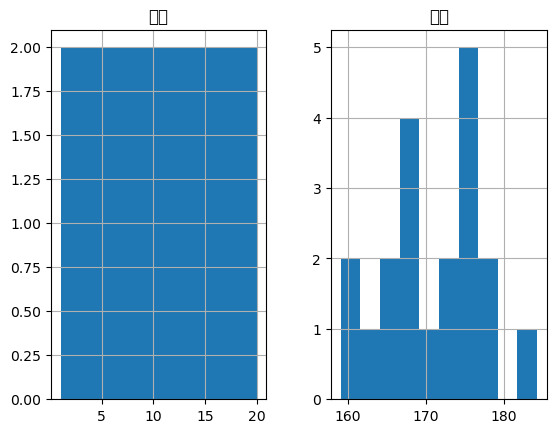

In [ ]:
# excelの1列をクリップボードにコピーしたものでヒストグラムを作成

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_clipboard()
df.hist()

    Height
No        
1    184.2
2    177.7
3    168.0
4    165.3
5    159.1
6    176.4
7    176.0
8    170.0
9    177.3
10   174.5
11   164.6
12   174.4
13   174.8
14   160.8
15   162.1
16   167.0
17   167.3
18   172.8
19   168.1
20   173.5


array([[<Axes: title={'center': 'Height'}>]], dtype=object)

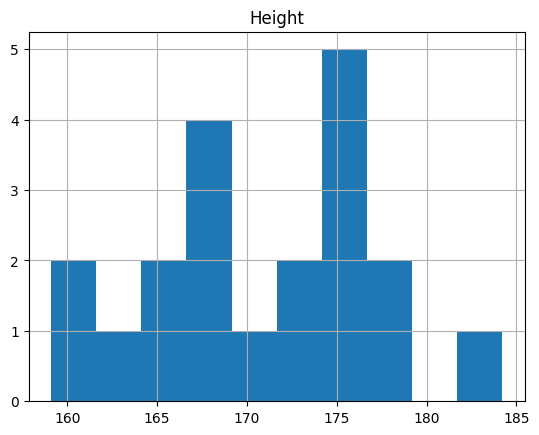

In [5]:
# Google Colabの場合は、excelファイルをDataFrameに読み込んで、ヒストグラムを作成します。
# height.xlsxをセッションストレージにアップロードが必要です。

import pandas as pd

df = pd.read_excel('height.xlsx', index_col=0)
print(df)

df.hist()

### 4.2 箱ひげ図
- データのばらつきを可視化したい場合に用いる  

（例）箱ひげ図のイメージ
![hakohige.png](https://drive.google.com/uc?id=1-jDjh5dyrkK6STk7ijsBlLUNOcZXZiL8)

（例）3.8節の「googleにおける「マスク」の相対検索数」の5値要約

|             | 6/17  | 6/18 | 6/19  | 6/20  |
| ----------- | ----- | ---- | ----- | ----- |
| 最小値      | 12    | 18   | 20    | 12    |
| 第1四分位数 | 17    | 20.5 | 35    | 19.25 |
| 第2四分位数 | 17.5  | 23   | 53    | 20    |
| 第3四分位数 | 18.75 | 24   | 64.75 | 24.5  |
| 最大値      | 26    | 26   | 100   | 48    |

これを箱ひげ図で表すと（箱ひげ図もexcelのグラフ機能で作成可能）

![mask_hakohige.png](https://drive.google.com/uc?id=1-dJ5eB4T17L8Yd_uSpRCs185SAMkb_Y6)

- 外れ値の表示：以下に定義されたひげの長さを超える値は外れ値とみなされる
    - 最小値方向に伸びるひげ：第1四分位数+1.5×四分位範囲
    - 最大値方向に伸びるひげ：第3四分位数+1.5×四分位範囲  
    
（例）外れ値を表示する箱ひげ図のイメージ

![外れ値.png](https://drive.google.com/uc?id=10HbJT9S2qh-D2liJrkbEZVIfX9fD3uCi)


（例）次のデータは男性、女性それぞれ15人の体重を測定したという想定のデータです

||男性|女性|
|-|-|-|
|1|	52|	51|
|2|	55|	52|
|3|	65|	58|
|4|	80|	49|
|5|	73|	57|
|6|	63|	53|
|7|	68|	54|
|8|	59|	51|
|9|	60|	47|
|10|57|	51|
|11|61|	53|
|12|77|	64|
|13|79|	60|
|14|54|	48|
|15|110|60|

これを箱ひげ図で表すpythonコードを以下に示します．ここでは，データをプログラム内に持っていますが，excelから読み込んでも可能です．

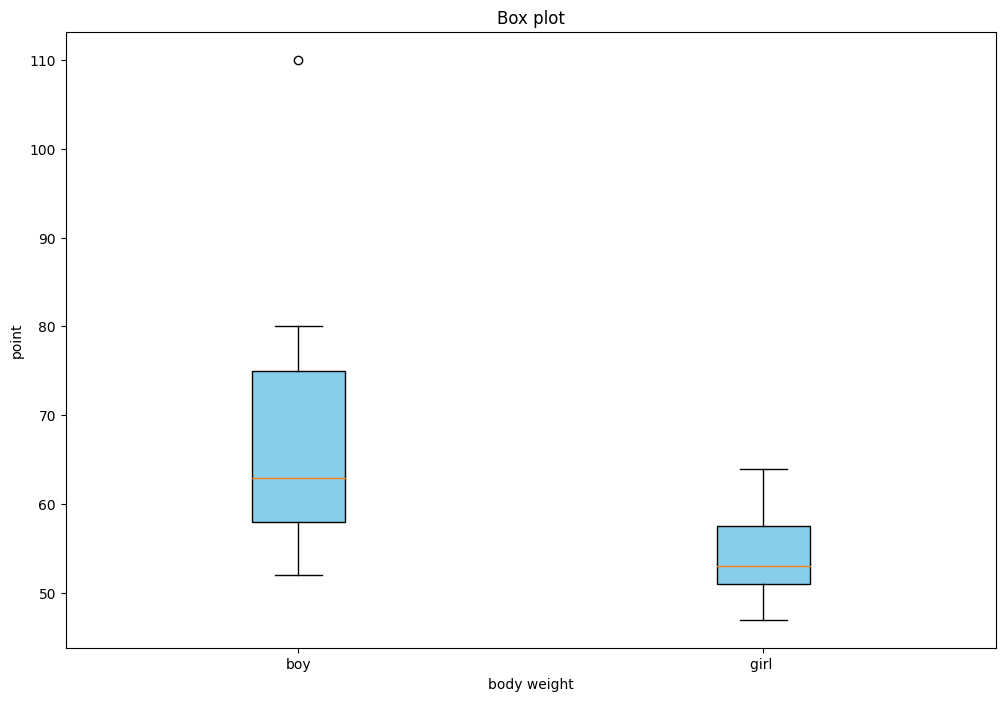

In [6]:
import matplotlib.pyplot as plt

data_boy = [52,55,65,80,73,63,68,59,60,57,61,77,79,54,110]
data_girl = [51,52,58,49,57,53,54,51,47,51,53,64,60,48,60]
data = (data_boy, data_girl)

fig, axes = plt.subplots(figsize = (12, 8))
plt.boxplot(data, patch_artist=True, widths=0.2,boxprops=dict(facecolor='skyblue',
                         color='black', linewidth=1))
axes.set_xticklabels(['boy', 'girl '])
plt.title('Box plot')
plt.xlabel('body weight')
plt.ylabel('point')
plt.show()

2020/6/17    18.166667
2020/6/18    22.333333
2020/6/19    56.166667
2020/6/20    24.166667
dtype: float64


<ipython-input-7-0deb09696f3e>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


<Axes: >

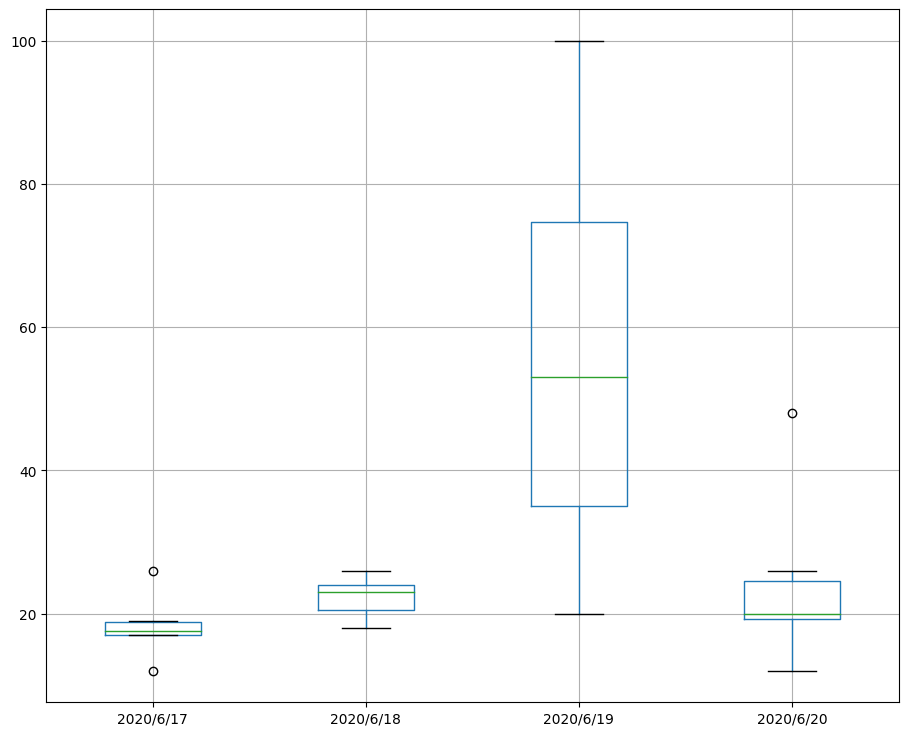

In [7]:
import numpy as np
import pandas as pd

%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(11, 9)

df = pd.read_excel('mask_tweet.xlsx')

print(df.mean())

df.boxplot()


### 4.3 折れ線グラフ
データの時系列変化を可視化  
（例）3.8節の「googleにおける「マスク」の相対検索数」の折れ線グラフ

![折れ線グラフ.png](https://drive.google.com/uc?id=107XG_q_LvAz09lQNlu36NZMT8wxkAb1i)

#### 度数折れ線グラフ
ヒストグラムの棒の上辺の中点を結んで得られるグラフ  
（例）4.1節の度数分布表を折れ線グラフで可視化

![度数折れ線.png](https://drive.google.com/uc?id=1-sRyBHG76B8LE6Rts08A_glHDXfZrO5K)



### 4.4 円グラフ・帯グラフ
- 円グラフは，割合のデータを可視化する方法の１つ．全体に対する個々の項目の割合を視覚的に表現するグラフ  
（例）あるレビューサイトでのクチコミの評判分析で，ポジティブ，ネガティブ，ニュートラルな単語の割合を表した円グラフ

![円グラフ.png](https://drive.google.com/uc?id=1-X4W5ck6_sKUQw7YHXmc-8OPq8yKTUlK)

- 帯グラフは，複数のデータにおける割合を比較する場合に利用（100%積み上げ棒グラフ）  
（例）ある映画「Ａ」と「Ｂ」の台本における文字種（ひらがな，カタカナ，漢字）の比率を比較する帯グラフ

![帯グラフ.png](https://drive.google.com/uc?id=1-utt4ifQy9eE0sKh4rkApeD54ww-aY9f)



### 4.5 モザイクプロット
- 複数のテキストやグループを比較．
- クロス集計表  
（例）COCA(Corpus of Contemporary American English)の話し言葉（Spoken)と学術散文（Academic）のサブコーパスにおける"as though"と"as if"（いずれも「まるで～であるかのように」という意味）の単純頻度を集権した結果

||as though|as if|
|-|-|-|
|Spoken|2068|4786|
|Academic|1286|5528|

以下では，このデータをpythonによるモザイクプロットで可視化したものです．

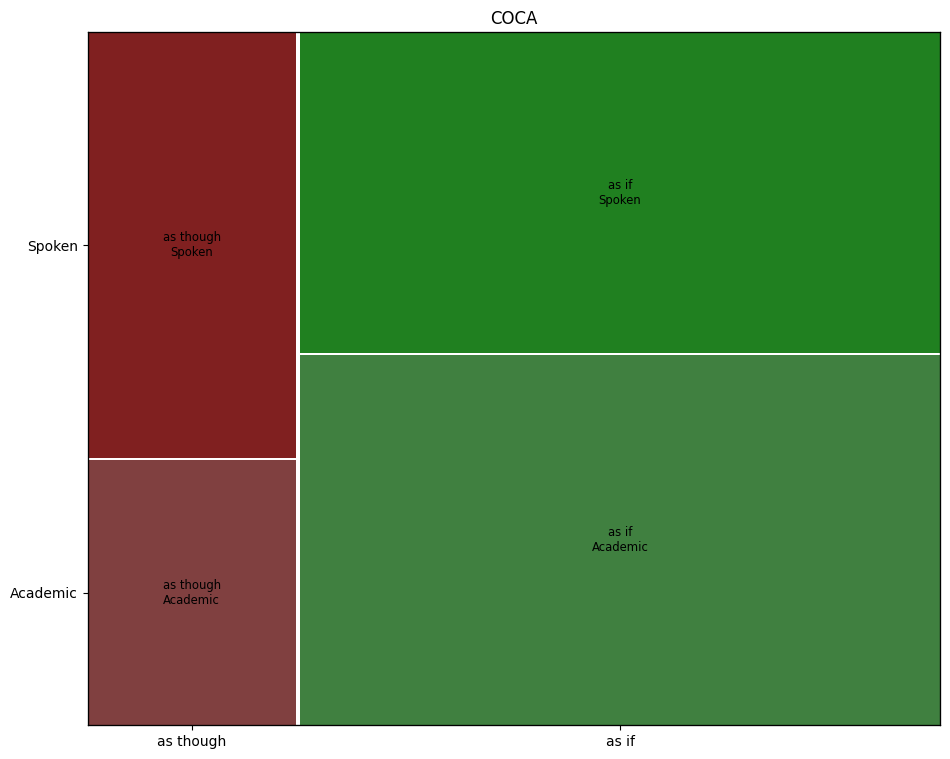

In [8]:
# モザイクプロットの作成
# 入力データはプログラム内に記述

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
data = {('as though', 'Academic'): 1286, ('as though', 'Spoken'): 2068, ('as if', 'Academic'): 5528, ('as if', 'Spoken',): 4786}
mosaic(data, title='COCA')
plt.show()

#### 次にタイタニック号の乗船者891人のデータを読み込んで，性別と生存情報でモザイク図を作成します．
- 同じディレクトリに乗船者データ：train.csvを配置する． https://www.kaggle.com/c/titanic からダウンロード

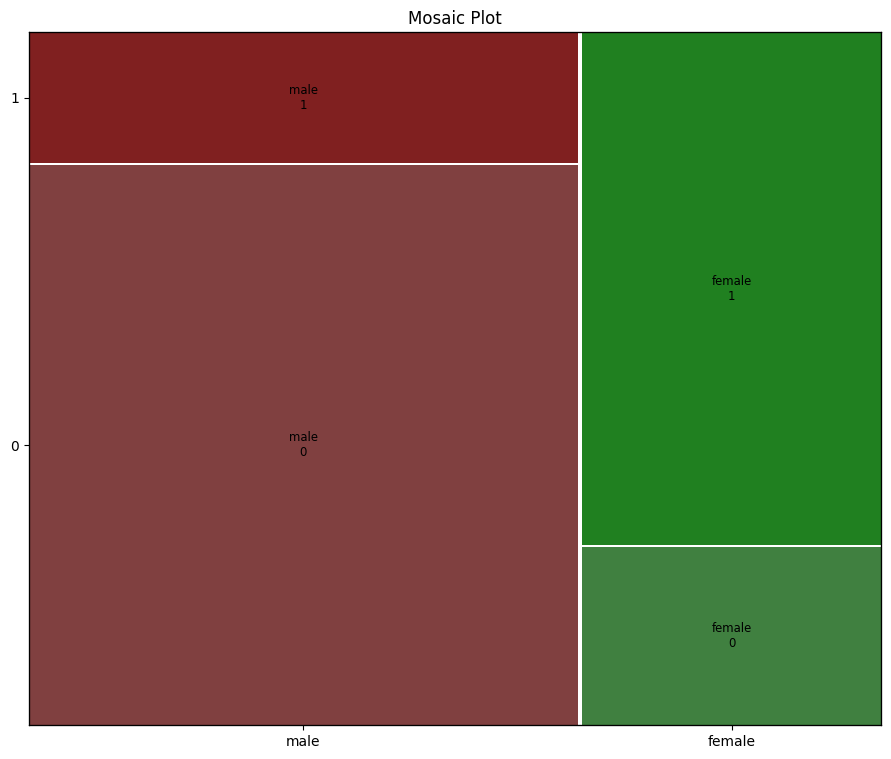

In [10]:
# モザイク図　タイタニック号の乗船者891人のデータで（性別/生存情報）
import pandas
import numpy
import matplotlib
from statsmodels.graphics.mosaicplot import mosaic

# ラベル付きトレーニングデータ読み込み
train_data = pandas.read_csv("titanic_train.csv", delimiter=",")
# Survived(生存情報)、Sex(性別)のモザイク図
# print(numpy.c_[train_data['Sex'], train_data['Survived']])
engineer_data = numpy.c_[train_data['Sex'], train_data['Survived']]
# DataFrame作成
myDataframe = pandas.DataFrame(engineer_data, columns=['Sex', 'Survived'])
# モザイク図作成、表示
mosaic(data=myDataframe, index=['Sex', 'Survived'], title='Mosaic Plot')
matplotlib.pyplot.show()

### 4.6 散布図
- 2つのデータの関連性を把握するために用いるグラフ．2次元データ（2変量データ）を可視化．
- 計量的なテキスト分析では，名詞率とMVR(modifier-verb ration)という指標を散布図で可視化してテキストを分類することがある
    - 名詞率：文章に含まれる情報量と密接にかかわる．高いと「要約的」で低いと「描写的」な文章であるとされる．
    - MVR：相対的に大きいと「ありさま描写的」で小さいと「動き描写的」であるとされる．
$$
名詞率=\frac{名詞の頻度}{総語数}×100
$$
$$
MVR=\frac{相(形容詞・形容動詞・副詞・連体詞)の頻度}{体(動詞)の頻度}×100
$$
（例）以下は9種類の例文から計算した名詞率(N)とMVRをまとめたものである．ここでは，名詞率とMVRにより，例文が「要約的」か，「ありさま描写的」か，「動き描写的」かを判定している．

|例文|作者|作品|表現|名詞率(N)|MVR|
|-|-|-|-|-|-|
|1|大岡昇平|武蔵野夫人|要約的|57|30|
|2|佐藤春夫|田園の憂鬱1|ありさま描写的|49|80|
|3|梶井基次郎|交尾|動き描写的|40|48|
|4|里見淳|みごとな醜聞|要約的|54|19|
|5|久米正雄|破船1|ありさま描写的|44|92|
|6|久米正雄|破船2|動き描写的|35|79|
|7|佐藤春夫|田園の憂鬱2|ありさま描写的|49|83|
|8|佐藤春夫|田園の憂鬱3|動き描写的|46|44|
|9|菊池寛|恩讐の彼方に|動き描写的|49|35|

これを散布図にすると以下のようになる





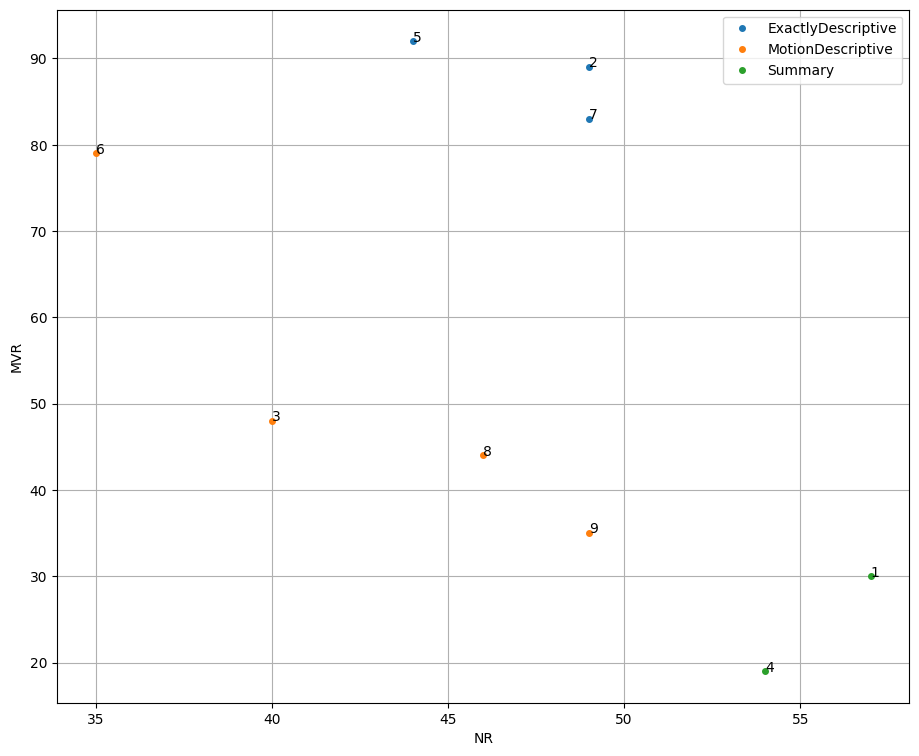

In [11]:
# 散布図　入力として上記データを scatterplot_data.xlsx　に入力
#
import numpy as np
import pandas as pd

%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(11, 9)

df = pd.read_excel('scatterplot_data.xlsx')
df.index = df.index + 1

# X軸の項目
colx = df.columns[4]
# Y軸の項目
coly = df.columns[5]
# 凡例
labels = ['ExactlyDescriptive', 'MotionDescriptive', 'Summary']

# targetごとに色分けしてプロットする
groups = df.groupby('expression')
for l, (status, group) in zip(labels, groups):
    plt.plot(group[colx], group[coly], marker='o', linestyle='', ms=4, label=l)
    plt.legend()

# 各要素にDataFrameのインデックスの数字をラベルとして付ける
for i, txt in enumerate(df.index.values):
    plt.annotate(txt, (df[colx].values[i], df[coly].values[i]))

plt.xlabel(colx)
plt.ylabel(coly)
plt.grid(True)
plt.show()

### 4.7 ワードクラウド
- ワードクラウド：テキスト中で出現頻度の高い単語を抽出し，その頻度に応じた大きさで表示する方法．
- UserLocalのサイト(　https://textmining.userlocal.jp/　)でワードクラウドの作成が可能（サンプルとして太宰治の「走れメロス」で作成可能）
- pythonのWordCloudライブラリを使って作成することも可能（以下にpythonを示す）
- ワードクラウドは，最近人気のある可視化手法であるが，頻度を分析するには最適とはいえない．たまたま目に入った単具に注意が向けられ，恣意的な解釈を招く危険性もある．

- 単語の頻度に関する順位を知りたいのであれば，頻度上位の単語を棒グラフで可視化するほうが効果的．
- これもUserLocalのサイトでワードクラウドと同時に作成可能（他に，共起キーワード，2次元マップ，係り受け解析，階層的クラスタリングが作成される）



In [12]:
!pip install wordcloud

In [13]:
!pip install mecab-python3
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=ca33076d8fed8bf0728a9541f25684c0d63a36683d0b4d8e669e6e30dad8f0c6
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


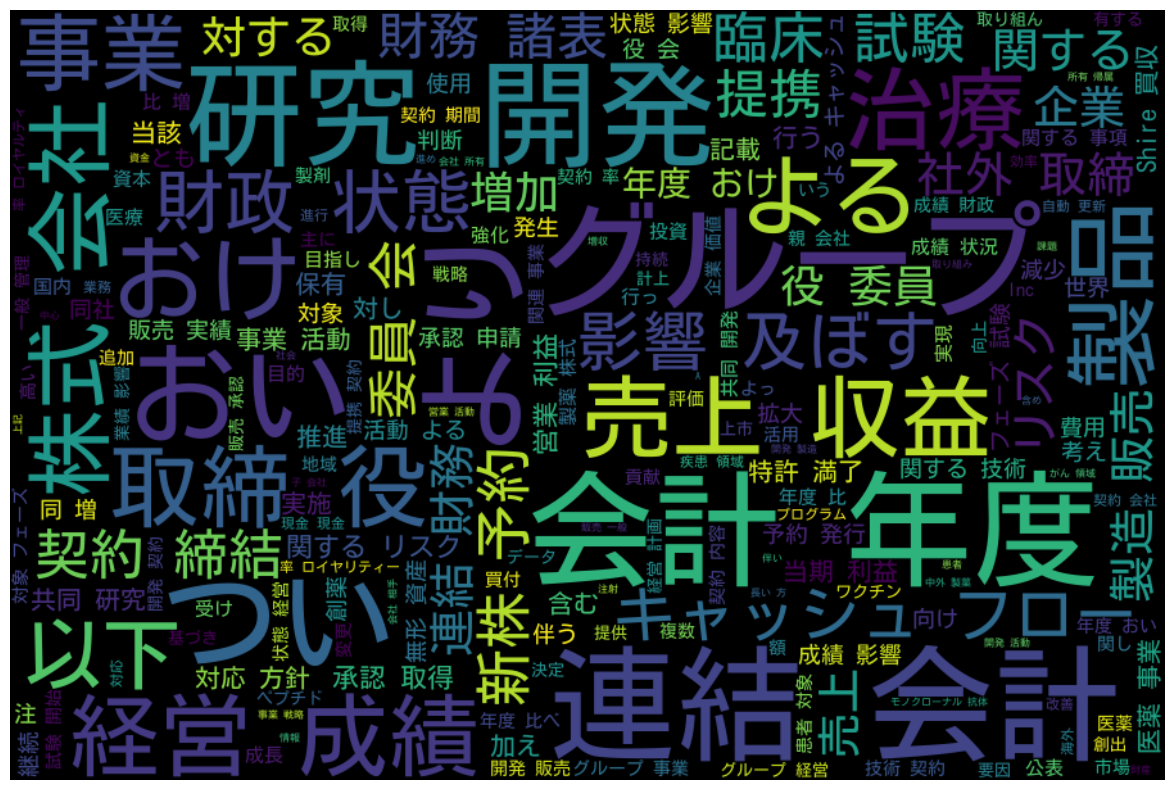

In [15]:
# テキストデータを読み込んで，WordCloudライブラリでワードクラウドを作成
# (1)WordCloudと(2)MeCabのインストールが必要
# (1)WordCloudは，Anaconda Promptで以下のコマンドを入力してインストールする．
#    （google colabにはインストール済み）
#    pip install wordcloud
# (2)# MeCabのインストールは、anacondaにmecab-paython3をインストール
#    anaconda promptで以下のコマンドを実行
#    pip install mecab-python3
#    pip install unidic-lite
#
# このブラウザーと同じディレクトリに，テキストデータのをwordcloud_test.txtを配置すること．

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import MeCab
import re

text = open("wordcloud_test.txt",mode="r",encoding="utf-8").read()
parse = MeCab.Tagger().parse(text)
lines = parse.split("\n")
items =  (re.split('[\t,]', line) for line in lines)

#print(text[1:100])
#print(lines)
#for item in items:
#    print(item[0],item[1])

words = []
i = 0
for item in items:
#    print(item)
    if item[0] == 'EOS' or item[0] == '':
        pass
    elif item[4] in ["名詞-普通名詞-一般", "名詞-普通名詞-サ変可能", "形容詞-一般", "動詞-一般", "副詞"]:
#    elif item[1] in ['名詞', '形容詞', '動詞', '副詞']:
#        print(item[0],item[1])
        words.append(item[0])
words = ' '.join(words)

#print(words)

# 日本語フォントを指定
font_path = "Kosugi-Regular.ttf"

stopwords = [u"円", u"億", u"万", u"当社", u"月", u"年",u"あり",u"おり",u"いる",u"なら",u"する",u"ある",u"ない",u"こと",u"なっ",u"でき",u"できる",u"これ",u"もの",u"よう",u"なる",u"はず",u"なり",u"それ",u"れる",u"られる",u"ここ",u"ため",u""]

wordcloud = WordCloud(max_font_size=100, width=900, height=600, font_path=font_path, stopwords=set(stopwords)).generate(words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

#plt.savefig("result/SR.png")
plt.show()

### 4.8 共起ネットワーク
- 単語と単語の共起を可視化する．
- これもUserLocalのサイトで作成できる．
- ツイートやアンケートなどの解析で利用．重要なキーワードと共起している単語から関連を推測できる可能性あり．
